###  (Personal anecdote): 
What if the number of N points affect our data fitting?
To see whether that is true:

In [4]:
import numpy as np
import scipy as scp
from scipy.stats import chi2
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import random as rndb

#Generating the model with parameters a,om,phi,b
a = 1
om = 1
phi = 0
b = 0.1

#where N is the number of elements for the model data set
N = 11
#To see whether the number of data points affect our fit
#we use a for loop to increase the N

In [5]:
#theoretical model to be used
def model(t,a,om,phi,b):
    return a * np.sin(om*t+phi)* np.exp(-b*t)

In [6]:
#where t is the independent variable
t = np.arange(0,3*np.pi+0.3*np.pi,0.3*np.pi)
t = np.linspace(0,3*np.pi,N)
#we generate the y of the model
y = model(t,a,om,phi,b)
#and add the noise
noise = 0.4 * np.random.normal(size=t.size)
ydata = y+noise -0.2

# print(x2(ydata,y))#

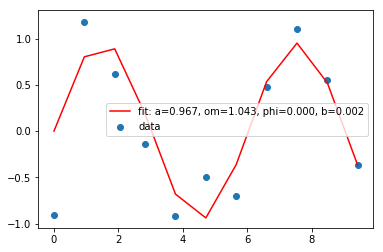

In [7]:
#Then, we plot the data
plt.scatter(t,ydata,label='data')

#and fit curves using a guided bound (a,1.1), (om,1.1), (phi,0.1), (b,0.2)
popt,pcov = curve_fit(model,t,ydata,bounds=(0,[1.1,1.1,.1,.2]))
plt.plot(t,model(t,*popt), 'r-',label='fit: a=%5.3f, om=%5.3f, phi=%5.3f, b=%5.3f' % tuple(popt))

plt.legend()
plt.show()

In [8]:
popt,pcov = curve_fit(model,t,y,bounds=(0,[1.1,1.1,.1,.2]))
print("a:",popt[0])
print("om:",popt[1])
print("phi:",popt[2])
print("b:",popt[3])

a: 0.9999895247460759
om: 0.9999912156196598
phi: 5.0702107943777835e-05
b: 0.09999822141129505


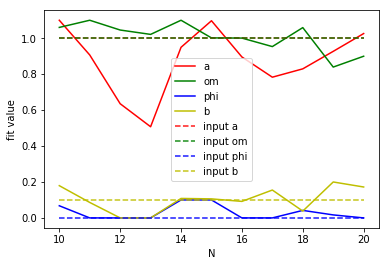

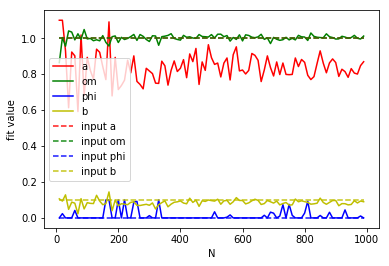

In [9]:
def loop(x):
    #collection of parameters per N_i
    c_a = np.array([])
    c_om = np.array([])
    c_phi = np.array([])
    c_b = np.array([])
    for i in x:
        #where N is the number of elements for the model data set
        N = i
        #where t is the independent variable
        t = np.arange(0,3*np.pi+0.3*np.pi,0.3*np.pi)
        t = np.linspace(0,3*np.pi,N)
        #we generate the y of the model
        y = model(t,a,om,phi,b)
        #and add the noise
        noise = 0.4 * np.random.normal(size=t.size)
        y = y+noise -0.2

        popt,pcov = curve_fit(model,t,y,bounds=(0,[1.1,1.1,.1,.2]))
        c_a = np.append(c_a,popt[0])
        c_om = np.append(c_om,popt[1])
        c_phi = np.append(c_phi,popt[2])
        c_b = np.append(c_b,popt[3])
    return y, c_a,c_om,c_phi,c_b
    
    

x = range(10,21)
y, c_a, c_om,c_phi,c_b = loop(x)

control1 = np.array([a]*len(x))
control2 = np.array([om]*len(x))
control3 = np.array([phi]*len(x))
control4 = np.array([b]*len(x))

plt.plot(x,c_a,label='a',color='r')
plt.plot(x,c_om,label='om',color='g')
plt.plot(x,c_phi,label='phi',color='b')
plt.plot(x,c_b,label='b',color='y')

plt.plot(x,control1,'--',color='r',alpha=0.9,label='input a')
plt.plot(x,control2,'--',color='g',alpha=0.9,label='input om')
plt.plot(x,control3,'--',color='b',alpha=0.9,label='input phi')
plt.plot(x,control4,'--',color='y',alpha=0.9,label='input b')
plt.xlabel("N")
plt.ylabel("fit value")
plt.legend()
plt.show()

x = range(10,1000,10)
y, c_a, c_om,c_phi,c_b = loop(x)

control1 = np.array([a]*len(x))
control2 = np.array([om]*len(x))
control3 = np.array([phi]*len(x))
control4 = np.array([b]*len(x))

plt.plot(x,c_a,label='a',color='r')
plt.plot(x,c_om,label='om',color='g')
plt.plot(x,c_phi,label='phi',color='b')
plt.plot(x,c_b,label='b',color='y')

plt.plot(x,control1,'--',color='r',alpha=0.9,label='input a')
plt.plot(x,control2,'--',color='g',alpha=0.9,label='input om')
plt.plot(x,control3,'--',color='b',alpha=0.9,label='input phi')
plt.plot(x,control4,'--',color='y',alpha=0.9,label='input b')
plt.xlabel("N")
plt.ylabel("fit value")
plt.legend()
plt.show()